<center><h1>Hong_Seungil_HW5</h1></center>
<br>
<br>

Name: Seungil Hong
<br>
Github Username: zonna19
<br>
USC ID: 2375832093 

## 1. Decision Trees as Interpretable Models

Import packages

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.tree import _tree
from sklearn import tree


### (a) Obtain Data

Get the Accute Inamations Data Set

In [36]:
df_raw = pd.read_csv('../data/diagnosis.data', sep='\s+', encoding='UTF_16', header=None, decimal=',')
df_raw.columns = ["a1", "a2", "a3", "a4", "a5", "a6", "d1", "d2"]
print(df_raw)

       a1   a2   a3   a4   a5   a6   d1   d2
0    35.5   no  yes   no   no   no   no   no
1    35.9   no   no  yes  yes  yes  yes   no
2    35.9   no  yes   no   no   no   no   no
3    36.0   no   no  yes  yes  yes  yes   no
4    36.0   no  yes   no   no   no   no   no
..    ...  ...  ...  ...  ...  ...  ...  ...
115  41.4   no  yes  yes   no  yes   no  yes
116  41.5   no   no   no   no   no   no   no
117  41.5  yes  yes   no  yes   no   no  yes
118  41.5   no  yes  yes   no  yes   no  yes
119  41.5   no  yes  yes   no  yes   no  yes

[120 rows x 8 columns]


### (b) Build a decision tree

In [37]:
# Encode Yes=1, No=0
label_encoders = {}
for column in df_raw.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_raw[column] = le.fit_transform(df_raw[column])
    label_encoders[column] = le

# Split data
X = df_raw.drop(['d1', 'd2'], axis=1)  # Target Variables
X

,a1,a2,a3,a4,a5,a6
0,35.5,0,1,0,0,0
1,35.9,0,0,1,1,1
2,35.9,0,1,0,0,0
3,36.0,0,0,1,1,1
4,36.0,0,1,0,0,0
...,...,...,...,...,...,...
115,41.4,0,1,1,0,1
116,41.5,0,0,0,0,0
117,41.5,1,1,0,1,0
118,41.5,0,1,1,0,1


DECISION TREE for 'd1'
|--- a4 <= 0.50
|   |--- class: 0
|--- a4 >  0.50
|   |--- a5 <= 0.50
|   |   |--- a6 <= 0.50
|   |   |   |--- class: 1
|   |   |--- a6 >  0.50
|   |   |   |--- class: 0
|   |--- a5 >  0.50
|   |   |--- class: 1



[Text(0.4, 0.875, 'x[3] <= 0.5\ngini = 0.5\nsamples = 120\nvalue = [61, 59]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]'),
 Text(0.6, 0.625, 'x[4] <= 0.5\ngini = 0.387\nsamples = 80\nvalue = [21, 59]'),
 Text(0.4, 0.375, 'x[5] <= 0.5\ngini = 0.437\nsamples = 31\nvalue = [21, 10]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 49\nvalue = [0, 49]')]

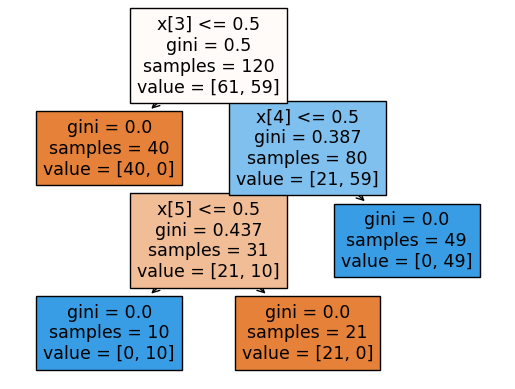

In [38]:
y = df_raw['d1']  # Change d1 or d2

# Build decision tree
clf1 = DecisionTreeClassifier(random_state=42)
clf1.fit(X, y)

# Visualize the decision tree (text-based representation)
r_d1 = export_text(clf1, feature_names=list(X.columns))
print("DECISION TREE for 'd1'")
print(r_d1)
tree.plot_tree(clf1, filled=True)

DECISION TREE for 'd2'
|--- a1 <= 37.95
|   |--- class: 0
|--- a1 >  37.95
|   |--- a3 <= 0.50
|   |   |--- class: 0
|   |--- a3 >  0.50
|   |   |--- class: 1



[Text(0.4, 0.8333333333333334, 'x[0] <= 37.95\ngini = 0.486\nsamples = 120\nvalue = [70, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 60\nvalue = [60, 0]'),
 Text(0.6, 0.5, 'x[2] <= 0.5\ngini = 0.278\nsamples = 60\nvalue = [10, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 50\nvalue = [0, 50]')]

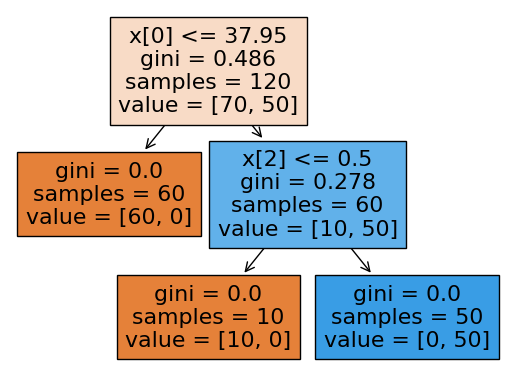

In [39]:
y = df_raw['d2']  # Change d1 or d2

# Build decision tree
clf2 = DecisionTreeClassifier(random_state=42)
clf2.fit(X, y)

# Visualize the decision tree (text-based representation)
r_d2 = export_text(clf2, feature_names=list(X.columns))
print("DECISION TREE for 'd2'")
print(r_d2)
tree.plot_tree(clf2, filled=True)

> The Gini impurity gives a measure of "disorder" in a set. 
>* A Gini impurity of 0 indicates that the set is "pure" and contains only one class.
>* A higher Gini impurity value indicates a more disordered set.

> To use Powerset labels. This is Multi label problem so using powerset is more interpretable. 

DECISION TREE for multi-label classification
|--- a1 <= 37.95
|   |--- a4 <= 0.50
|   |   |--- class: 0
|   |--- a4 >  0.50
|   |   |--- class: 1
|--- a1 >  37.95
|   |--- a3 <= 0.50
|   |   |--- class: 0
|   |--- a3 >  0.50
|   |   |--- a2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- a2 >  0.50
|   |   |   |--- a4 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- a4 >  0.50
|   |   |   |   |--- class: 0



[Text(0.4, 0.9, 'x[0] <= 37.95\ngini = 0.493\nsamples = 120\nvalue = [[61, 59]\n[70, 50]]'),
 Text(0.2, 0.7, 'x[3] <= 0.5\ngini = 0.222\nsamples = 60\nvalue = [[20, 40]\n[60, 0]]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [[20, 0]\n[20, 0]]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [[0, 40]\n[40, 0]]'),
 Text(0.6, 0.7, 'x[2] <= 0.5\ngini = 0.355\nsamples = 60\nvalue = [[41, 19]\n[10, 50]]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[10, 0]]'),
 Text(0.7, 0.5, 'x[1] <= 0.5\ngini = 0.236\nsamples = 50\nvalue = [[31, 19]\n[0, 50]]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 21\nvalue = [[21, 0]\n[0, 21]]'),
 Text(0.8, 0.3, 'x[3] <= 0.5\ngini = 0.226\nsamples = 29\nvalue = [[10, 19]\n[0, 29]]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 10\nvalue = [[10, 0]\n[0, 10]]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 19\nvalue = [[0, 19]\n[0, 19]]')]

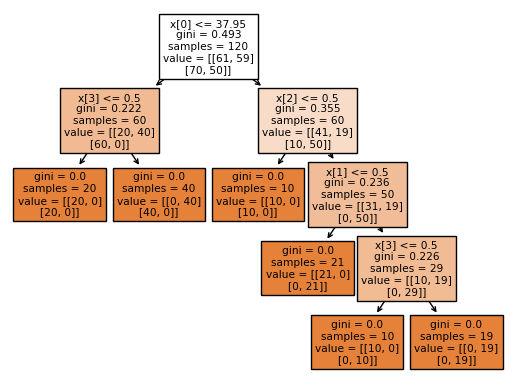

In [40]:
# 1. Label Combination for powerset
y_multi = df_raw[['d1', 'd2']]

# 2. Training the Classifier
clf_multi = DecisionTreeClassifier(random_state=42)
clf_multi.fit(X, y_multi)

# 3. Visualize the decision tree
print("DECISION TREE for multi-label classification")
r_multi = export_text(clf_multi, feature_names=list(X.columns))
print(r_multi)
tree.plot_tree(clf_multi, filled=True)

### (c) Convert the decision rules

In [41]:
def tree_to_code(tree, feature_names):

    '''
    Outputs a decision tree model as if/then pseudocode
    Parameters:
    -----------
    tree: decision tree model
    The decision tree to represent as pseudocode
    feature_names: list
    The feature names of the dataset used for building the decision tree
    '''
    
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{indent}return {tree_.value[node]}")

    recurse(0, 1)

In [42]:
tree_to_code(clf_multi, df_raw.columns[0:6])

def tree(a1, a2, a3, a4, a5, a6):
  if a1 <= 37.95000076293945:
    if a4 <= 0.5:
      return [[20.  0.]
 [20.  0.]]
    else:  # if a4 > 0.5
      return [[ 0. 40.]
 [40.  0.]]
  else:  # if a1 > 37.95000076293945
    if a3 <= 0.5:
      return [[10.  0.]
 [10.  0.]]
    else:  # if a3 > 0.5
      if a2 <= 0.5:
        return [[21.  0.]
 [ 0. 21.]]
      else:  # if a2 > 0.5
        if a4 <= 0.5:
          return [[10.  0.]
 [ 0. 10.]]
        else:  # if a4 > 0.5
          return [[ 0. 19.]
 [ 0. 19.]]


### (d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability

Best ccp_alpha: 0.0
Validation Accuracy with best ccp_alpha: 100.00%


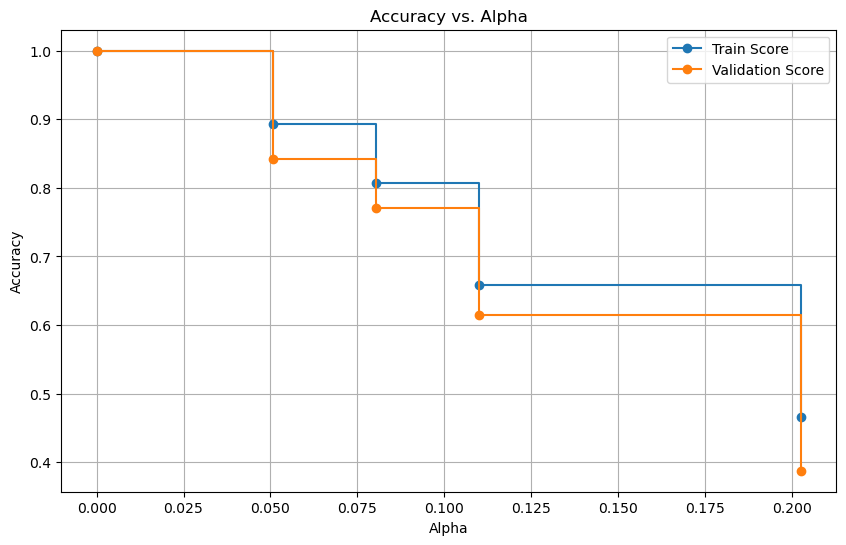

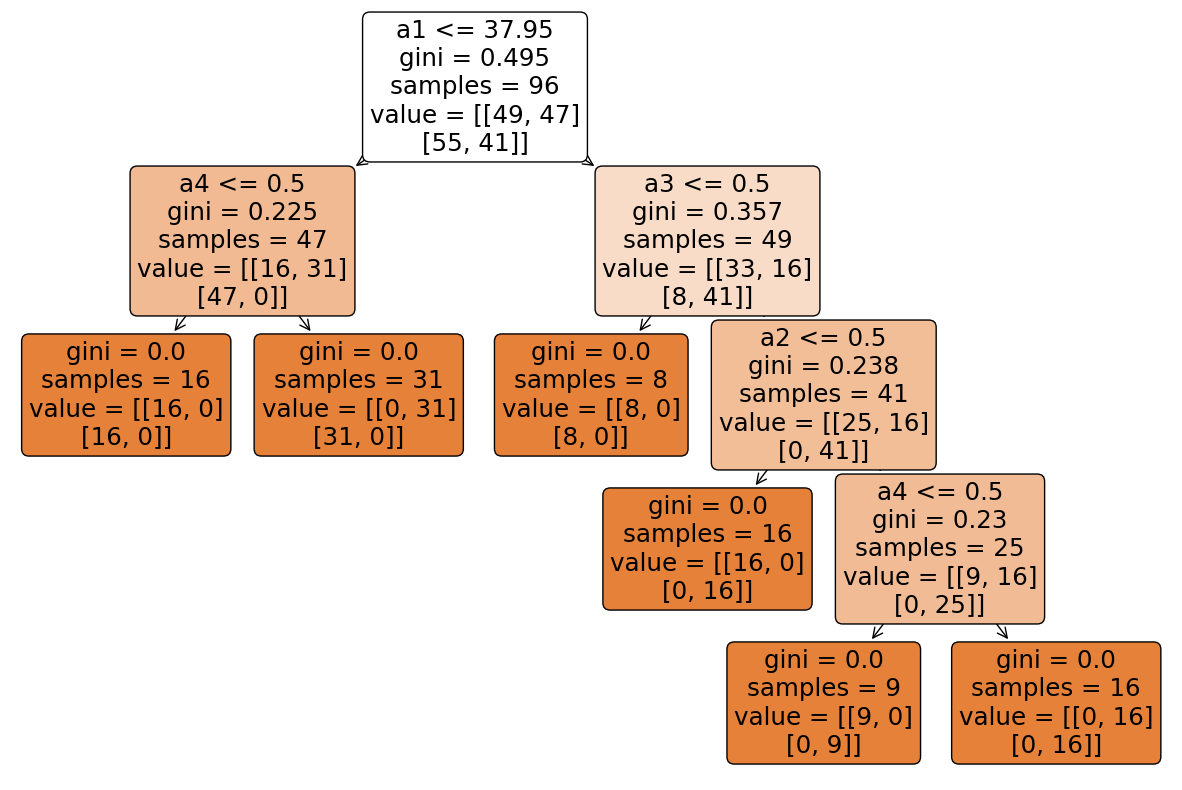

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_multi, test_size=0.20, random_state=42)

# Train the initial tree to determine the pruning path
clf_initial = DecisionTreeClassifier(random_state=42)
clf_initial.fit(X_train, y_train)
path = clf_initial.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Setup GridSearchCV
param_grid = {'ccp_alpha': ccp_alphas}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best classifier and corresponding ccp_alpha
best_clf = grid_search.best_estimator_
best_alpha = grid_search.best_params_['ccp_alpha']

# Print the best alpha
print(f"Best ccp_alpha: {best_alpha}")

# Evaluate on validation set
val_score = best_clf.score(X_val, y_val)
print(f"Validation Accuracy with best ccp_alpha: {val_score*100:.2f}%")

# Plot the accuracy vs alpha values
train_scores = grid_search.cv_results_['mean_train_score']
test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train Score', drawstyle='steps-post')
plt.plot(ccp_alphas, test_scores, marker='o', label='Validation Score', drawstyle='steps-post')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Alpha')
plt.legend()
plt.grid(True)
plt.show()

# Visualize the decision tree
plt.figure(figsize=(15, 10))
tree.plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.show()

> * Although the training and CV accuracy are both at the highest at full tree model (alpha = 0), for interpretability I increased alpha to have less depth.

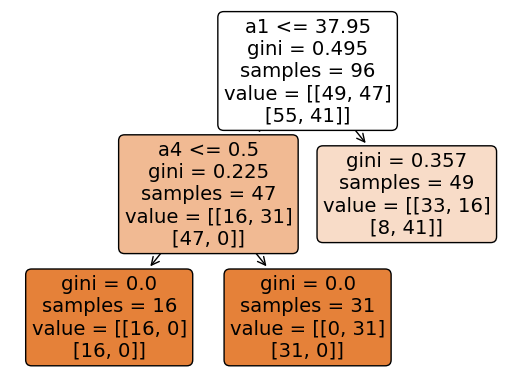

In [44]:
# Train decision trees using different values of alpha
clf_interpret = DecisionTreeClassifier(random_state=42, ccp_alpha=0.1)
clf_interpret.fit(X_train, y_train)

# 5. Visualize the selected tree
plt.figure()
tree.plot_tree(clf_interpret, filled=True, feature_names=X.columns, class_names=True, rounded=True)
plt.show()

* For code reference

In [45]:
tree_to_code(clf_interpret, df_raw.columns[0:6])

def tree(a1, a2, a3, a4, a5, a6):
  if a1 <= 37.95000076293945:
    if a4 <= 0.5:
      return [[16.  0.]
 [16.  0.]]
    else:  # if a4 > 0.5
      return [[ 0. 31.]
 [31.  0.]]
  else:  # if a1 > 37.95000076293945
    return [[33. 16.]
 [ 8. 41.]]


## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

### (b) Missing values

### (c) Plot a correlation matrix

### (d) Calculate the Coefficient of Variation CV

### (e) Scatter plots and box plots for highest CV features

### (f) Fit a linear model

### (g) Fit a ridge regression model

### (h) Fit a LASSO model

### (i) Fit a PCR model

### (j) Fit a boosting tree